In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [ ]:
iris = load_iris()

X = iris.data          # features
y = iris.target        # labels
target_names = iris.target_names

print("Original data shape:", X.shape)


Original data shape: (150, 4)


In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [ ]:
minmax = MinMaxScaler()
X_normalized = minmax.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

print("PCA transformed shape:", X_pca.shape)


PCA transformed shape: (150, 2)


In [ ]:
print("Explained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

print("Cumulative Explained Variance:",
      np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio:
PC1: 0.7296
PC2: 0.2285
Cumulative Explained Variance: [0.72962445 0.95813207]


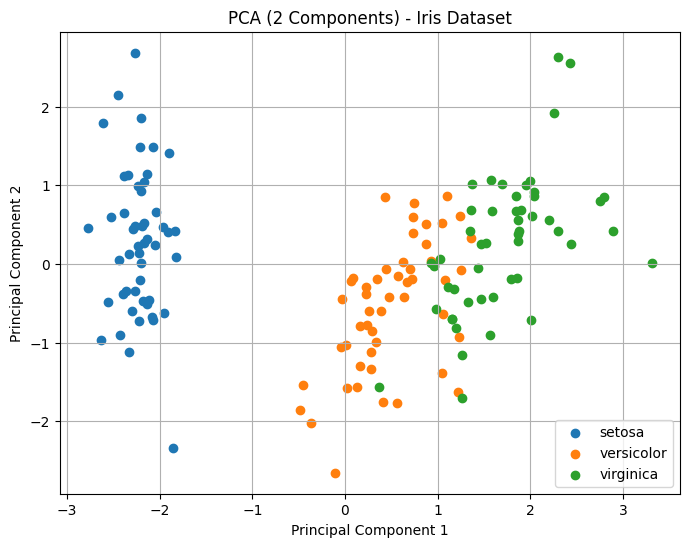

In [ ]:
plt.figure(figsize=(8,6))

for label, name in enumerate(target_names):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=name
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2 Components) - Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()


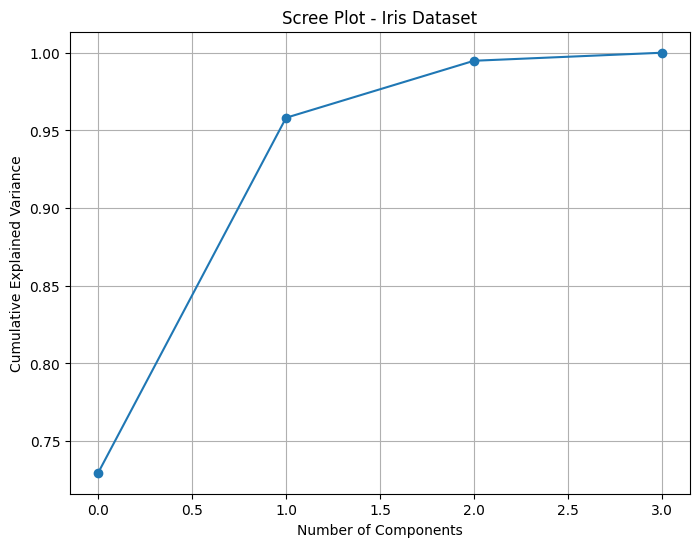

In [ ]:
pca_full = PCA()
pca_full.fit(X_standardized)

plt.figure(figsize=(8,6))
plt.plot(
    np.cumsum(pca_full.explained_variance_ratio_),
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - Iris Dataset")
plt.grid(True)
plt.show()


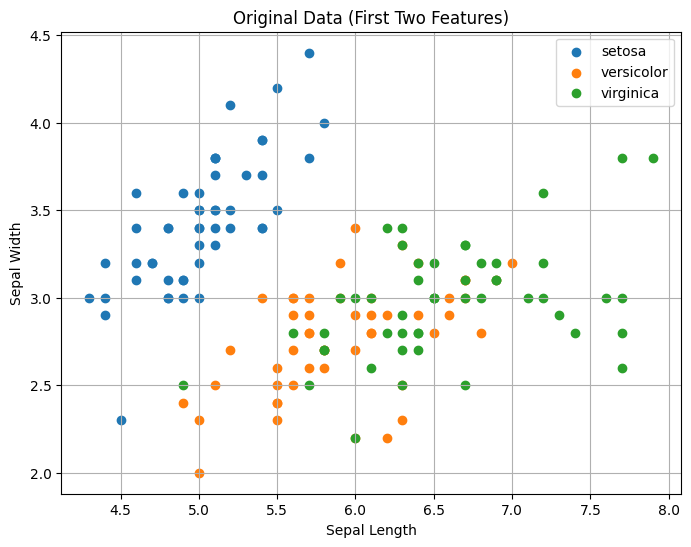

In [ ]:
plt.figure(figsize=(8,6))

for label, name in enumerate(target_names):
    plt.scatter(
        X[y == label, 0],
        X[y == label, 1],
        label=name
    )

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Original Data (First Two Features)")
plt.legend()
plt.grid(True)
plt.show()
